# 비정상 절차서 23-06 : 증기발생기 전열관 누설 시

## 1.0 데이터 처리

In [38]:
import pickle
import matplotlib.pyplot as plt
from collections import deque
with open('D:/CRONI_New_Interface/new_db_30mal/ab23_06_30004_(175).pkl', 'rb') as f:
    db = pickle.load(f)
sym_ch = {0:deque(maxlen=5), 1:deque(maxlen=5)}

## 2.0 경보 및 증상

### 2.1 모든 원자로냉각재계통 누설 시 공통적 증상

### 2.1.1 PZR 수위 또는 압력 감소

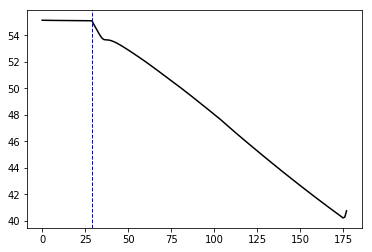

In [32]:
# ZINST63 : 가압기 수위
plt.plot(db['ZINST63'], color='k') # -> 수위 감소 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

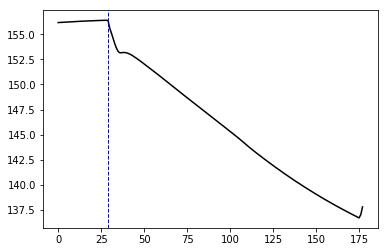

In [33]:
# ZINST58 : 가압기 압력
plt.plot(db['ZINST58'], color='k') # -> 압력 감소 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

### If-Then Rule 검증

In [46]:
pzr_level, pzr_pres = [], []
for i in range(len(db)):
    if i > 30:
    sym_ch[0].append(db['ZINST63'][i])
    sym_ch[1].append(db['ZINST58'][i])
    if len(sym_ch[0]) == 5:
        if sym_ch[0][0] > sym_ch[0][1] > sym_ch[0][2] > sym_ch[0][3] > sym_ch[0][4]:
            pzr_level.append(i+1)
#             print(f'수위 감소 증상 만족 시간 : {i+1}초')
    if len(sym_ch[1]) == 5:
        if sym_ch[1][0] > sym_ch[1][1] > sym_ch[1][2] > sym_ch[1][3] > sym_ch[1][4]:
            pzr_pres.append(i+1)
#             print(f'압력 감소 증상 만족 시간 : {i+1}초')
print(f'최초 수위 감소 증상 만족 시간 : {pzr_level[0]}초')
print(f'최초 압력 감소 증상 만족 시간 : {pzr_pres[0]}초')

최초 수위 감소 증상 만족 시간 : 5초
최초 압력 감소 증상 만족 시간 : 33초


Report
1. 단순 감소 표현으로 규칙을 생성할 경우, 고장 주입 전 증상이 만족하는 현상
2. 이를 해결하기 위해 고장 주입 이후 증상 평가를 수행
3. 2의 문제점으로 비정상 발생 이후 증상 평가를 해야한다는 강제사항이 발생
결론: 보여주기식으로는 2번으로 해도 상관없으나, 해당 부분은 고민할 필요성이 있다고 판단됨.
개선점: 추가적인 개선 방안으로 이동평균선의 활용이 검토됨. 추후 활용하여 판단할 예정임.